In [ ]:
# Install required libraries
!pip install -q tensorflow keras opencv-python
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/Psoriasis'
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 164 images belonging to 5 classes.
Found 43 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Adjust to your number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,037 (91.20 MB)

 Trainable params: 23,908,037 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=40
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 61s 9s/step - accuracy: 0.1967 - loss: 8.9752 - val_accuracy: 0.3721 - val_loss: 2.2965
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 487ms/step - accuracy: 0.2021 - loss: 2.7928 - val_accuracy: 0.1860 - val_loss: 1.5521
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - accuracy: 0.2310 - loss: 1.6027 - val_accuracy: 0.2791 - val_loss: 1.4836
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 492ms/step - accuracy: 0.3024 - loss: 1.6100 - val_accuracy: 0.3953 - val_loss: 1.4312
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 484ms/step - accuracy: 0.3480 - loss: 1.5212 - val_accuracy: 0.3256 - val_loss: 1.4343
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 760ms/step - accuracy: 0.3561 - loss: 1.4120 - val_accuracy: 0.5116 - val_loss: 1.3090
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 489ms/step - accuracy: 0.4860 - loss: 1.3534 - val_accuracy: 0.5116 - val_loss: 1.3504
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 486ms/step - accuracy: 0.3897 - loss: 1.5464 - val_accuracy: 0.5116 - val_loss: 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
[[1 0 0 2 4]
 [4 1 1 3 2]
 [1 1 0 2 3]
 [0 1 2 1 6]
 [3 1 1 1 2]]
              precision    recall  f1-score   support

           0       0.11      0.14      0.12         7
           1       0.25      0.09      0.13        11
           2       0.00      0.00      0.00         7
           3       0.11      0.10      0.11        10
           4       0.12      0.25      0.16         8

    accuracy                           0.12        43
   macro avg       0.12      0.12      0.10        43
weighted avg       0.13      0.12      0.11        43



In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_true), y=y_true)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6323 - loss: 1.0801
Test Accuracy: 0.60
Test Loss: 1.11


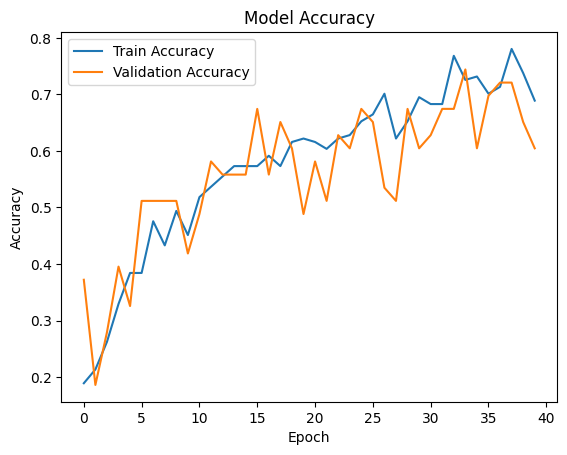

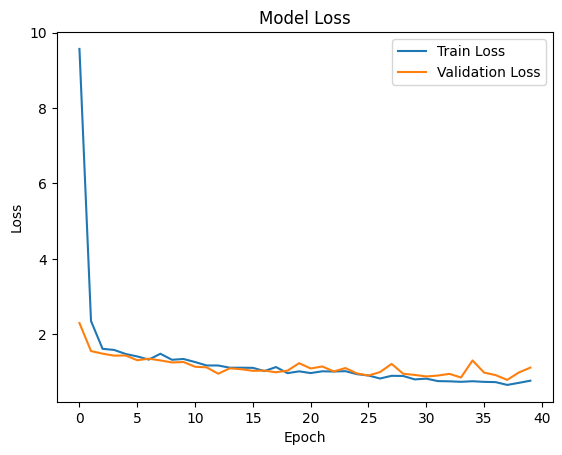

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Psoriasis/psoriasis_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_class(img_path):

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_index]

    return class_label

# Example usage
img_path = '/content/drive/MyDrive/Psoriasis/sample.jpg'
predicted_class = predict_class(img_path)
print("Predicted Psoriasis Type:", predicted_class)
recommendations = {
    "Erythrodermic": {
        "Diet": """Avoid spicy foods, alcohol, and caffeine. Increase intake of hydrating fruits (watermelon, cucumber), omega-3 rich foods (flaxseeds, walnuts), and leafy greens. Drink at least 3L of water per day.""",
        "Medicine": """Immunosuppressants like Cyclosporine or Methotrexate. In severe cases, Biologics like Infliximab may be recommended. Consult a dermatologist immediately as this type can be life-threatening."""
    },
    "Guattate": {
        "Diet": """Consume oily fish (salmon, sardines), berries (blueberries, strawberries), and green vegetables. Avoid refined sugars and white bread. Boost Vitamin D intake via sunlight or fortified foods.""",
        "Medicine": """Topical corticosteroids (like betamethasone), phototherapy (narrowband UVB), or short-term oral antibiotics (if triggered by strep throat)."""
    },
    "Inversus": {
        "Diet": """Follow a low-sugar, low-carb, gluten-free diet. Include anti-inflammatory foods like turmeric, ginger, olive oil, and avocados. Avoid synthetic clothing, as sweating can worsen symptoms.""",
        "Medicine": """Topical calcineurin inhibitors like Tacrolimus or Pimecrolimus, which are less irritating in sensitive areas. Antifungal creams if infections occur."""
    },
    "Plaque": {
        "Diet": """Anti-inflammatory diet including fatty fish, olive oil, spinach, and nuts. Limit red meat, processed food, dairy, and sugar. Consider Vitamin D and omega-3 supplements.""",
        "Medicine": """Topical steroids (clobetasol), Vitamin D analogs (calcipotriene), and biologics like Adalimumab or Etanercept for moderate to severe cases."""
    },
    "Pustular": {
        "Diet": """Stay well hydrated, avoid spicy and greasy food. Include cooling foods like cucumber, coconut water, and aloe vera juice. Limit intake of dairy and animal protein.""",
        "Medicine": """Systemic treatments like Acitretin, Methotrexate, or Biologics. In severe cases, hospitalization and IV therapy may be required."""
    }
}

print("Recommended Diet:", recommendations[predicted_class]['Diet'])
print("Suggested Medicine:", recommendations[predicted_class]['Medicine'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
Predicted Psoriasis Type: Inversus
Recommended Diet: Follow a low-sugar, low-carb, gluten-free diet. Include anti-inflammatory foods like turmeric, ginger, olive oil, and avocados. Avoid synthetic clothing, as sweating can worsen symptoms.
Suggested Medicine: Topical calcineurin inhibitors like Tacrolimus or Pimecrolimus, which are less irritating in sensitive areas. Antifungal creams if infections occur.


In [ ]:
#  checking code Install Gradio if not already installed
!pip install gradio

# Imports
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import PIL

# Load your trained model (adjust path if needed)
model = load_model('/content/drive/MyDrive/Psoriasis/psoriasis_model.h5')  # change filename if needed

# Class labels (in same order as model training)
class_labels = ['Erythrodermic', 'Guattate', 'Inversus', 'Plaque', 'Pustular']

# Detailed recommendations
recommendations = {
    "Erythrodermic": {
        "Diet": """Avoid spicy foods, alcohol, and caffeine. Increase intake of hydrating fruits (watermelon, cucumber), omega-3 rich foods (flaxseeds, walnuts), and leafy greens. Drink at least 3L of water per day.""",
        "Medicine": """Immunosuppressants like Cyclosporine or Methotrexate. In severe cases, Biologics like Infliximab may be recommended. Consult a dermatologist immediately as this type can be life-threatening."""
    },
    "Guattate": {
        "Diet": """Consume oily fish (salmon, sardines), berries (blueberries, strawberries), and green vegetables. Avoid refined sugars and white bread. Boost Vitamin D intake via sunlight or fortified foods.""",
        "Medicine": """Topical corticosteroids (like betamethasone), phototherapy (narrowband UVB), or short-term oral antibiotics (if triggered by strep throat)."""
    },
    "Inversus": {
        "Diet": """Follow a low-sugar, low-carb, gluten-free diet. Include anti-inflammatory foods like turmeric, ginger, olive oil, and avocados. Avoid synthetic clothing, as sweating can worsen symptoms.""",
        "Medicine": """Topical calcineurin inhibitors like Tacrolimus or Pimecrolimus, which are less irritating in sensitive areas. Antifungal creams if infections occur."""
    },
    "Plaque": {
        "Diet": """Anti-inflammatory diet including fatty fish, olive oil, spinach, and nuts. Limit red meat, processed food, dairy, and sugar. Consider Vitamin D and omega-3 supplements.""",
        "Medicine": """Topical steroids (clobetasol), Vitamin D analogs (calcipotriene), and biologics like Adalimumab or Etanercept for moderate to severe cases."""
    },
    "Pustular": {
        "Diet": """Stay well hydrated, avoid spicy and greasy food. Include cooling foods like cucumber, coconut water, and aloe vera juice. Limit intake of dairy and animal protein.""",
        "Medicine": """Systemic treatments like Acitretin, Methotrexate, or Biologics. In severe cases, hospitalization and IV therapy may be required."""
    }
}

# Prediction function
def predict_psoriasis(img: PIL.Image.Image):
    # Resize and normalize image
    img = img.resize((224, 224))  # Match input shape of your model
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = class_labels[class_index]

    # Fetch recommendation
    diet = recommendations[class_label]["Diet"]
    medicine = recommendations[class_label]["Medicine"]

    return class_label, diet, medicine

# Launch Gradio Interface
interface = gr.Interface(
    fn=predict_psoriasis,
    inputs=gr.Image(type="pil", label="Upload Image"),
    outputs=[
        gr.Textbox(label="Detected Psoriasis Type"),
        gr.Textbox(label="Suggested Diet (Detailed)", lines=5),
        gr.Textbox(label="Recommended Medicines (Detailed)", lines=5)
    ],
    title="🧬 Psoriasis Type Detector",
    description="Upload a skin image to detect psoriasis type and get detailed diet + medicine recommendations."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d9ad8f6adad4676f2a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install -q tensorflow opencv-python scikit-learn
import os
import shutil
import numpy as np
import cv2
from sklearn.cluster import KMeans
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tqdm import tqdm
# Adjust to your drive
base_path = '/content/drive/MyDrive/Psoriasis'

source_dirs = {
    'train': os.path.join(base_path, 'train'),
    'test': os.path.join(base_path, 'test')
}

output_dirs = {
    'train': os.path.join(base_path, 'train_severity'),
    'test': os.path.join(base_path, 'test_severity')
}

# Create severity folders (mild, moderate, severe)
for mode in output_dirs:
    for severity in ['mild', 'moderate', 'severe']:
        os.makedirs(os.path.join(output_dirs[mode], severity), exist_ok=True)


In [ ]:
# Load pre-trained MobileNetV2 without the top layer
feature_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def load_images_and_extract_features(folder_path):
    features = []
    file_paths = []

    for psoriasis_type in os.listdir(folder_path):
        type_path = os.path.join(folder_path, psoriasis_type)
        if not os.path.isdir(type_path):
            continue

        for filename in tqdm(os.listdir(type_path), desc=psoriasis_type):
            img_path = os.path.join(type_path, filename)

            try:
                img = load_img(img_path, target_size=(224, 224))
                img_array = img_to_array(img)
                img_array = preprocess_input(img_array)
                img_array = np.expand_dims(img_array, axis=0)

                feature = feature_model.predict(img_array)
                features.append(feature[0])
                file_paths.append(img_path)
            except:
                continue

    return np.array(features), file_paths


In [ ]:
def cluster_and_save_images(mode):
    print(f"🔍 Clustering {mode} data...")
    features, file_paths = load_images_and_extract_features(source_dirs[mode])

    # KMeans with 3 clusters = mild/moderate/severe
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(features)

    for i, path in enumerate(file_paths):
        cluster = clusters[i]
        if cluster == 0:
            severity = 'mild'
        elif cluster == 1:
            severity = 'moderate'
        else:
            severity = 'severe'

        fname = os.path.basename(path)
        dest = os.path.join(output_dirs[mode], severity, fname)
        shutil.copy(path, dest)

    print(f"✅ Saved clustered {mode} images in:", output_dirs[mode])


In [ ]:
cluster_and_save_images('train')
cluster_and_save_images('test')


🔍 Clustering train data...


Erythrodermic:   0%|          | 0/26 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Erythrodermic:   4%|▍         | 1/26 [00:05<02:11,  5.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Erythrodermic:  12%|█▏        | 3/26 [00:05<00:32,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Erythrodermic:  19%|█▉        | 5/26 [00:05<00:15,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Erythrodermic:  23%|██▎       | 6/26 [00:05<00:11,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Erythrodermic:  31%|███       | 8/26 [00:05<00:06,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Erythrodermic:  38%|███▊      | 10/26 [00:06<00:04,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Erythrodermic:  46%|████▌     | 12/26 [00:06<00:02,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Erythrodermic:  54%|█████▍    | 14/26 [00:06<00:01,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Erythrodermic:  62%|██████▏   | 16/26 [00:06<00:01,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Erythrodermic:  69%|██████▉   | 18/26 [00:06<00:00,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Erythrodermic:  77%|███████▋  | 20/26 [00:06<00:00,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Erythrodermic:  85%|████████▍ | 22/26 [00:07<00:00,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Erythrodermic:  92%|█████████▏| 24/26 [00:07<00:00,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Guattate:   0%|          | 0/41 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Guattate:   2%|▏         | 1/41 [00:00<00:04,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Guattate:   5%|▍         | 2/41 [00:00<00:05,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Guattate:   7%|▋         | 3/41 [00:00<00:05,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Guattate:  10%|▉         | 4/41 [00:00<00:05,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Guattate:  12%|█▏        | 5/41 [00:00<00:04,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Guattate:  15%|█▍        | 6/41 [00:00<00:04,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Guattate:  17%|█▋        | 7/41 [00:00<00:04,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Guattate:  20%|█▉        | 8/41 [00:00<00:03,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Guattate:  22%|██▏       | 9/41 [00:01<00:03,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Guattate:  24%|██▍       | 10/41 [00:01<00:03,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Guattate:  27%|██▋       | 11/41 [00:01<00:04,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Guattate:  29%|██▉       | 12/41 [00:01<00:03,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Guattate:  32%|███▏      | 13/41 [00:01<00:03,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Guattate:  34%|███▍      | 14/41 [00:01<00:03,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Guattate:  37%|███▋      | 15/41 [00:01<00:03,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Guattate:  39%|███▉      | 16/41 [00:02<00:03,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Guattate:  41%|████▏     | 17/41 [00:02<00:02,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Guattate:  44%|████▍     | 18/41 [00:02<00:02,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Guattate:  46%|████▋     | 19/41 [00:02<00:02,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Guattate:  49%|████▉     | 20/41 [00:02<00:02,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Guattate:  51%|█████     | 21/41 [00:02<00:02,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Guattate:  54%|█████▎    | 22/41 [00:02<00:02,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Guattate:  56%|█████▌    | 23/41 [00:02<00:02,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Guattate:  59%|█████▊    | 24/41 [00:03<00:02,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Guattate:  61%|██████    | 25/41 [00:03<00:02,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Guattate:  63%|██████▎   | 26/41 [00:03<00:02,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Guattate:  66%|██████▌   | 27/41 [00:03<00:01,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Guattate:  68%|██████▊   | 28/41 [00:03<00:01,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Guattate:  71%|███████   | 29/41 [00:03<00:01,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Guattate:  73%|███████▎  | 30/41 [00:03<00:01,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Guattate:  78%|███████▊  | 32/41 [00:04<00:01,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Guattate:  83%|████████▎ | 34/41 [00:04<00:00,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Guattate:  85%|████████▌ | 35/41 [00:04<00:00,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Guattate:  90%|█████████ | 37/41 [00:04<00:00,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Guattate:  95%|█████████▌| 39/41 [00:04<00:00,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Guattate:  98%|█████████▊| 40/41 [00:04<00:00,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Plaque:   0%|          | 0/40 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Plaque:   5%|▌         | 2/40 [00:00<00:03, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Plaque:  10%|█         | 4/40 [00:00<00:03, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Plaque:  15%|█▌        | 6/40 [00:00<00:03,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Plaque:  18%|█▊        | 7/40 [00:00<00:03,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Plaque:  20%|██        | 8/40 [00:00<00:03,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Plaque:  22%|██▎       | 9/40 [00:00<00:03,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Plaque:  28%|██▊       | 11/40 [00:01<00:03,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Plaque:  32%|███▎      | 13/40 [00:01<00:02,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Plaque:  38%|███▊      | 15/40 [00:01<00:02, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Plaque:  42%|████▎     | 17/40 [00:01<00:02, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Plaque:  48%|████▊     | 19/40 [00:01<00:02,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Plaque:  52%|█████▎    | 21/40 [00:02<00:01,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Plaque:  57%|█████▊    | 23/40 [00:02<00:01,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Plaque:  60%|██████    | 24/40 [00:02<00:01,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Plaque:  62%|██████▎   | 25/40 [00:02<00:01,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Plaque:  65%|██████▌   | 26/40 [00:02<00:01,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Plaque:  70%|███████   | 28/40 [00:02<00:01,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Plaque:  72%|███████▎  | 29/40 [00:03<00:01,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Plaque:  78%|███████▊  | 31/40 [00:03<00:00,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Plaque:  82%|████████▎ | 33/40 [00:03<00:00,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Plaque:  88%|████████▊ | 35/40 [00:03<00:00, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Plaque:  92%|█████████▎| 37/40 [00:03<00:00, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Plaque:  98%|█████████▊| 39/40 [00:04<00:00,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Pustular:   0%|          | 0/32 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Pustular:   6%|▋         | 2/32 [00:00<00:02, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Pustular:  12%|█▎        | 4/32 [00:00<00:02, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Pustular:  19%|█▉        | 6/32 [00:00<00:02, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Pustular:  25%|██▌       | 8/32 [00:00<00:02,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Pustular:  31%|███▏      | 10/32 [00:00<00:02, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Pustular:  38%|███▊      | 12/32 [00:01<00:01, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Pustular:  44%|████▍     | 14/32 [00:01<00:01, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Pustular:  50%|█████     | 16/32 [00:01<00:01, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Pustular:  56%|█████▋    | 18/32 [00:01<00:01, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Pustular:  62%|██████▎   | 20/32 [00:01<00:01, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Pustular:  69%|██████▉   | 22/32 [00:02<00:00, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Pustular:  75%|███████▌  | 24/32 [00:02<00:00,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Pustular:  81%|████████▏ | 26/32 [00:02<00:00, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Pustular:  88%|████████▊ | 28/32 [00:02<00:00, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Pustular:  94%|█████████▍| 30/32 [00:02<00:00, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Inversus:   0%|          | 0/25 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Inversus:   4%|▍         | 1/25 [00:00<00:02,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Inversus:   8%|▊         | 2/25 [00:00<00:02,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Inversus:  16%|█▌        | 4/25 [00:00<00:02,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Inversus:  24%|██▍       | 6/25 [00:00<00:01, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Inversus:  32%|███▏      | 8/25 [00:00<00:01, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Inversus:  40%|████      | 10/25 [00:00<00:01, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Inversus:  48%|████▊     | 12/25 [00:01<00:01,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Inversus:  56%|█████▌    | 14/25 [00:01<00:01,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Inversus:  64%|██████▍   | 16/25 [00:01<00:00,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Inversus:  68%|██████▊   | 17/25 [00:01<00:00,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Inversus:  72%|███████▏  | 18/25 [00:01<00:00,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Inversus:  76%|███████▌  | 19/25 [00:02<00:00,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Inversus:  80%|████████  | 20/25 [00:02<00:00,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Inversus:  84%|████████▍ | 21/25 [00:02<00:00,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Inversus:  88%|████████▊ | 22/25 [00:02<00:00,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Inversus:  92%|█████████▏| 23/25 [00:02<00:00,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Inversus:  96%|█████████▌| 24/25 [00:02<00:00,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Inversus: 100%|██████████| 25/25 [00:02<00:00,  8.75it/s]


✅ Saved clustered train images in: /content/drive/MyDrive/Psoriasis/train_severity
🔍 Clustering test data...


Guattate:   0%|          | 0/11 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Guattate:   9%|▉         | 1/11 [00:00<00:01,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Guattate:  18%|█▊        | 2/11 [00:00<00:01,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Guattate:  27%|██▋       | 3/11 [00:00<00:01,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Guattate:  36%|███▋      | 4/11 [00:00<00:01,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Guattate:  45%|████▌     | 5/11 [00:00<00:00,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Guattate:  55%|█████▍    | 6/11 [00:00<00:00,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Guattate:  64%|██████▎   | 7/11 [00:01<00:00,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Guattate:  73%|███████▎  | 8/11 [00:01<00:00,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Guattate:  82%|████████▏ | 9/11 [00:01<00:00,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Pustular:   0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Pustular:  12%|█▎        | 1/8 [00:00<00:00,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Pustular:  38%|███▊      | 3/8 [00:00<00:00,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Pustular:  50%|█████     | 4/8 [00:00<00:00,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Pustular:  62%|██████▎   | 5/8 [00:00<00:00,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Pustular:  75%|███████▌  | 6/8 [00:00<00:00,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Pustular:  88%|████████▊ | 7/8 [00:00<00:00,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Plaque:   0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Plaque:  20%|██        | 2/10 [00:00<00:00, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Plaque:  40%|████      | 4/10 [00:00<00:00,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Plaque:  60%|██████    | 6/10 [00:00<00:00, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Plaque:  80%|████████  | 8/10 [00:00<00:00, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Erythrodermic:   0%|          | 0/7 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Erythrodermic:  29%|██▊       | 2/7 [00:00<00:00, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Erythrodermic:  57%|█████▋    | 4/7 [00:00<00:00,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Erythrodermic:  71%|███████▏  | 5/7 [00:00<00:00,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Erythrodermic:  86%|████████▌ | 6/7 [00:00<00:00,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Inversus:   0%|          | 0/7 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Inversus:  14%|█▍        | 1/7 [00:00<00:01,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Inversus:  29%|██▊       | 2/7 [00:00<00:01,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Inversus:  43%|████▎     | 3/7 [00:00<00:00,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Inversus:  57%|█████▋    | 4/7 [00:00<00:00,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Inversus:  71%|███████▏  | 5/7 [00:01<00:00,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Inversus:  86%|████████▌ | 6/7 [00:01<00:00,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Inversus: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]


✅ Saved clustered test images in: /content/drive/MyDrive/Psoriasis/test_severity


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Paths
severity_train_dir = os.path.join(base_path, 'train_severity')
severity_test_dir = os.path.join(base_path, 'test_severity')

# Image augmentation
datagen = ImageDataGenerator(rescale=1./255)

train_sev_data = datagen.flow_from_directory(
    severity_train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_sev_data = datagen.flow_from_directory(
    severity_test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model architecture
severity_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 severity levels
])

severity_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
severity_model.summary()

# Train
severity_model.fit(
    train_sev_data,
    validation_data=test_sev_data,
    epochs=30
)

# Save model
severity_model.save(os.path.join(base_path, 'severity_model.h5'))


Found 164 images belonging to 3 classes.
Found 43 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 752ms/step - accuracy: 0.3953 - loss: 4.0357 - val_accuracy: 0.4186 - val_loss: 1.1804
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.5224 - loss: 1.0836 - val_accuracy: 0.3023 - val_loss: 1.6492
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.5442 - loss: 0.8568 - val_accuracy: 0.3488 - val_loss: 1.8821
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.6381 - loss: 0.6989 - val_accuracy: 0.4186 - val_loss: 2.3039
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.7487 - loss: 0.6358 - val_accuracy: 0.4186 - val_loss: 2.0310
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.8105 - loss: 0.4987 - val_accuracy: 0.4419 - val_loss: 2.8818
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step - accuracy: 0.8354 - loss: 0.4116 - val_accuracy: 0.4884 - val_loss: 2.4379
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.9196 - loss: 0.3124 - val_accuracy: 0.4651 - val_loss

In [ ]:
# Install Gradio if not already installed
!pip install gradio

# Imports
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load models
type_model = load_model('/content/drive/MyDrive/Psoriasis/psoriasis_model.h5')
severity_model = load_model('/content/drive/MyDrive/Psoriasis/severity_model.h5')

# Class labels
type_labels = ['Erythrodermic', 'Guattate', 'Inversus', 'Plaque', 'Pustular']
severity_labels = ['Mild', 'Moderate', 'Severe']

# Recommendation dictionary (already defined)
recommendations = {
    "Erythrodermic": {
        "Diet": """Avoid spicy foods, alcohol, and caffeine. Increase intake of hydrating fruits (watermelon, cucumber), omega-3 rich foods (flaxseeds, walnuts), and leafy greens. Drink at least 3L of water per day.""",
        "Medicine": """Immunosuppressants like Cyclosporine or Methotrexate. In severe cases, Biologics like Infliximab may be recommended. Consult a dermatologist immediately as this type can be life-threatening."""
    },
    "Guattate": {
        "Diet": """Consume oily fish (salmon, sardines), berries (blueberries, strawberries), and green vegetables. Avoid refined sugars and white bread. Boost Vitamin D intake via sunlight or fortified foods.""",
        "Medicine": """Topical corticosteroids (like betamethasone), phototherapy (narrowband UVB), or short-term oral antibiotics (if triggered by strep throat)."""
    },
    "Inversus": {
        "Diet": """Follow a low-sugar, low-carb, gluten-free diet. Include anti-inflammatory foods like turmeric, ginger, olive oil, and avocados. Avoid synthetic clothing, as sweating can worsen symptoms.""",
        "Medicine": """Topical calcineurin inhibitors like Tacrolimus or Pimecrolimus, which are less irritating in sensitive areas. Antifungal creams if infections occur."""
    },
    "Plaque": {
        "Diet": """Anti-inflammatory diet including fatty fish, olive oil, spinach, and nuts. Limit red meat, processed food, dairy, and sugar. Consider Vitamin D and omega-3 supplements.""",
        "Medicine": """Topical steroids (clobetasol), Vitamin D analogs (calcipotriene), and biologics like Adalimumab or Etanercept for moderate to severe cases."""
    },
    "Pustular": {
        "Diet": """Stay well hydrated, avoid spicy and greasy food. Include cooling foods like cucumber, coconut water, and aloe vera juice. Limit intake of dairy and animal protein.""",
        "Medicine": """Systemic treatments like Acitretin, Methotrexate, or Biologics. In severe cases, hospitalization and IV therapy may be required."""
    }
}

# Updated prediction function
CONFIDENCE_THRESHOLD = 0.7  # You can try 0.6 or 0.75 based on your tests

def predict_with_severity(img: Image.Image):
    # Preprocess
    img_resized = img.resize((224, 224))
    img_array = image.img_to_array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict psoriasis type
    type_pred = type_model.predict(img_array)[0]
    max_type_confidence = np.max(type_pred)
    type_index = np.argmax(type_pred)

    # Confidence filter
    if max_type_confidence < CONFIDENCE_THRESHOLD:
        return "Possibly Normal Skin", "-", "No specific diet", "No medication — consult a dermatologist."

    # If confident → continue
    type_label = type_labels[type_index]

    # Predict severity
    severity_pred = severity_model.predict(img_array)[0]
    severity_index = np.argmax(severity_pred)
    severity_label = severity_labels[severity_index]

    # Recommendations
    diet = recommendations[type_label]["Diet"]
    medicine = recommendations[type_label]["Medicine"]

    return f"{type_label} (Confidence: {max_type_confidence:.2f})", severity_label, diet, medicine
# Gradio interface
interface = gr.Interface(
    fn=predict_with_severity,
    inputs=gr.Image(type="pil", label="Upload Skin Image"),
    outputs=[
        gr.Textbox(label="Detected Psoriasis Type"),
        gr.Textbox(label="Estimated Severity Level"),
        gr.Textbox(label="Suggested Diet (Detailed)", lines=5),
        gr.Textbox(label="Recommended Medicines (Detailed)", lines=5)
    ],
    title="🧬 Psoriasis Type & Severity Detector",
    description="Upload a skin image to detect psoriasis type and severity level, with recommended treatment and diet."
)

# Launch
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d2e2128ebcc6c6db02.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step


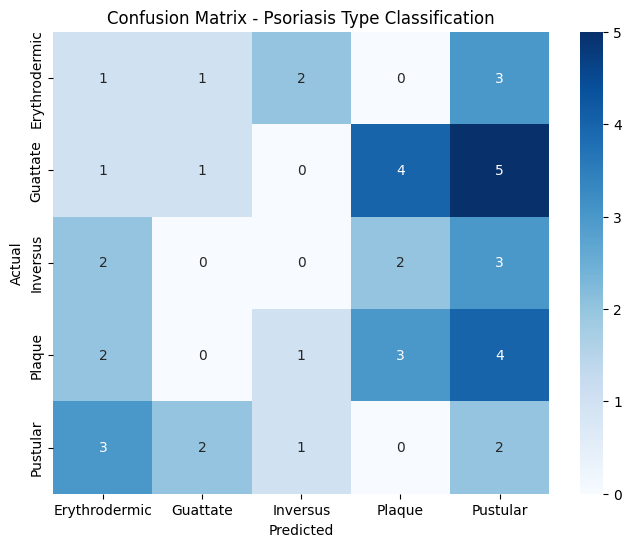

In [ ]:
# Install if not already
!pip install seaborn

# Imports
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Example code after prediction
y_true = test_data.classes
y_pred_probs = type_model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

class_labels = ['Erythrodermic', 'Guattate', 'Inversus', 'Plaque', 'Pustular']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Psoriasis Type Classification")
plt.show()


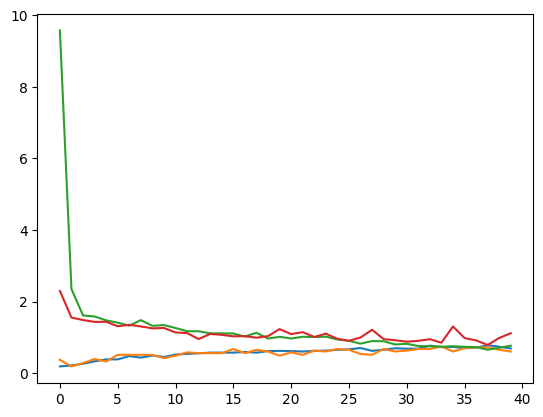

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')


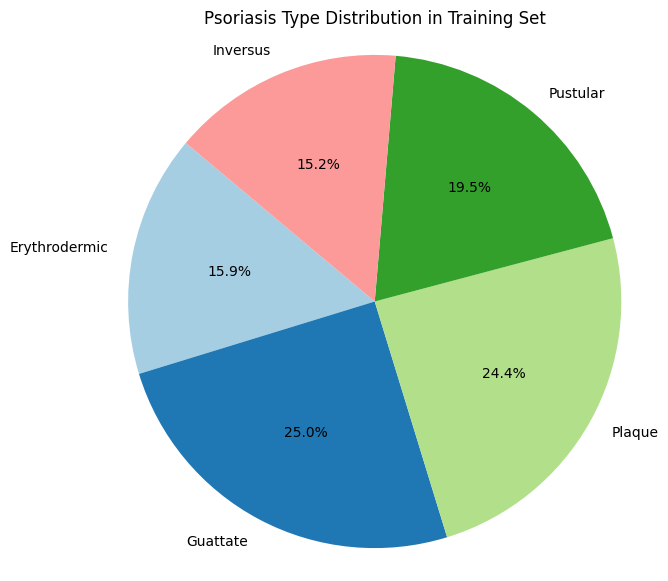

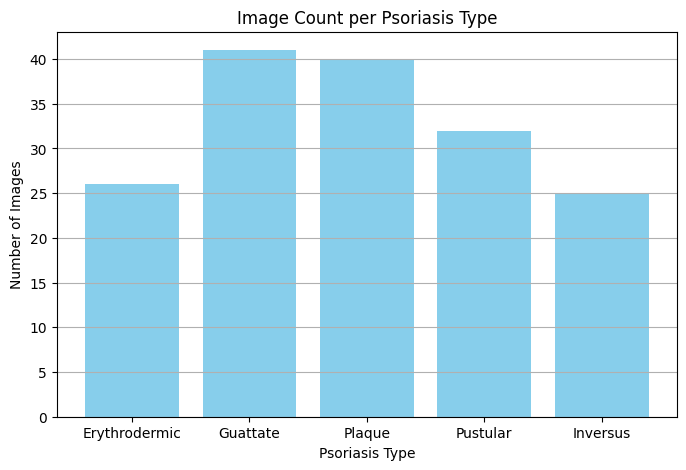

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to your training directory
train_dir = '/content/drive/MyDrive/Psoriasis/train'

# Count images per class
class_labels = os.listdir(train_dir)
counts = [len(os.listdir(os.path.join(train_dir, cls))) for cls in class_labels]

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Psoriasis Type Distribution in Training Set")
plt.axis('equal')
plt.show()
plt.figure(figsize=(8,5))
plt.bar(class_labels, counts, color='skyblue')
plt.title("Image Count per Psoriasis Type")
plt.xlabel("Psoriasis Type")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()


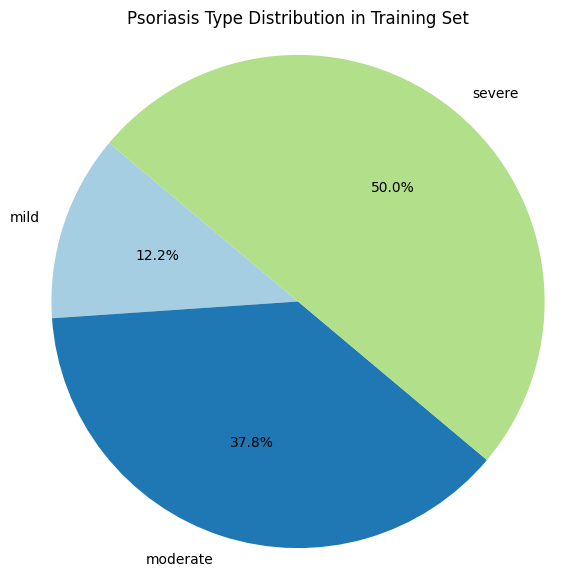

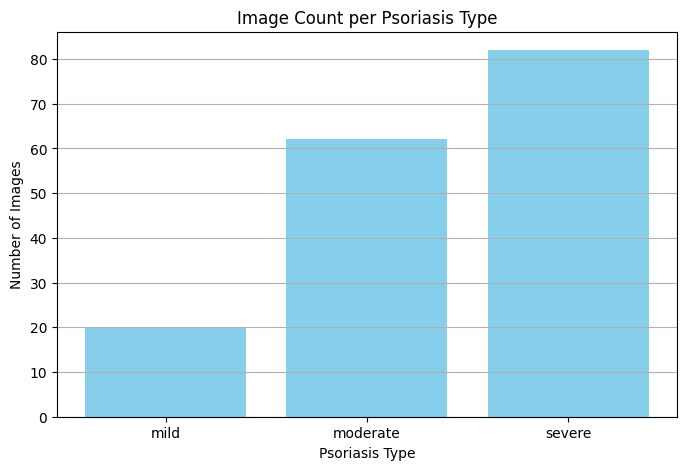

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to your training directory
train_dir = '/content/drive/MyDrive/Psoriasis/train_severity'

# Count images per class
class_labels = os.listdir(train_dir)
counts = [len(os.listdir(os.path.join(train_dir, cls))) for cls in class_labels]

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Psoriasis Type Distribution in Training Set")
plt.axis('equal')
plt.show()
plt.figure(figsize=(8,5))
plt.bar(class_labels, counts, color='skyblue')
plt.title("Image Count per Psoriasis Type")
plt.xlabel("Psoriasis Type")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()
